# **ML Supervisado: Árboles de Decisión y Clasificación Bayesiana (Gaussian Naive Bayes)**

# Predicción de Supervivencia - El Titanic

El objetivo es predecir si una persona:
*   0 = No Sobrevive
*   1 = Sobrevive

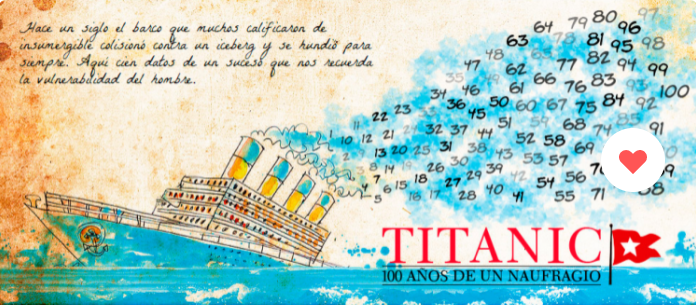

# Breve reseña.

El hundimiento del RMS Titanic fue una catástrofe marítima ocurrida en la noche del 14 al 15 de abril de 1912, cuando el transatlántico británico RMS Titanic —de la naviera White Star Line—, que realizaba su viaje inaugural de Southampton a Nueva York, colisionó con un iceberg en el océano Atlántico.

### Importamos librerías

In [50]:
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sb
 
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

# librerías Árboles de Decisión
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont

# librerías Gaussian Naive Bayes
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import make_scorer




In [51]:
from google.colab import files
uploaded = files.upload()

Saving titanic.csv to titanic (1).csv


# **Variable Objetivo (Target): Survived**
# 0 = No Sobrevive
# 1 = Sobrevive

In [52]:
df = pd.read_csv('titanic.csv')
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


### Visualización de Datos

In [53]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Fare'],
      dtype='object')

# Distribución Variable Objetivo (Target) Relación: 1 : 0.63

In [54]:
print(df.groupby('Survived').size())
# 0: No sobrevivió, 1: Sobrevivió

Survived
0    545
1    342
dtype: int64


# Gráfico de Barras

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


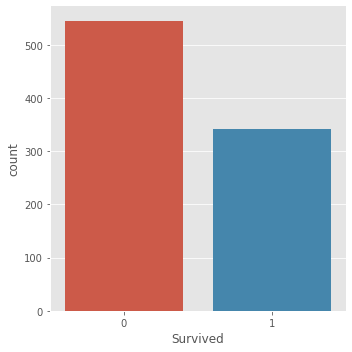

In [55]:
sb.factorplot('Survived',data=df,kind="count")

In [56]:
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [57]:
df.tail()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.00
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.00
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.45
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.00
886,0,3,Mr. Patrick Dooley,male,32.0,0,0,7.75


In [58]:
df = df.drop(['Name'],axis=1)
df.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [59]:
df.loc[df['Sex'] == 'male', 'Sex']= 0
df.loc[df['Sex'] == 'female', 'Sex']= 1

In [60]:
df['Sex'] = list(map(int, df['Sex']))

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


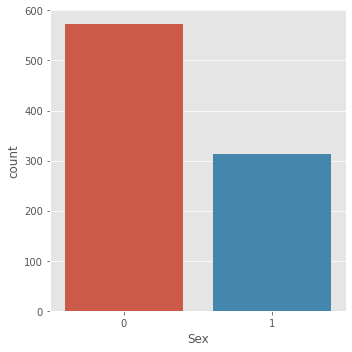

In [61]:
sb.factorplot('Sex',data=df,kind="count")

# Sexo Hombres (0) vs Mujeres (1) - relación 1: 0.55

In [62]:
print(df.groupby('Sex').size())

Sex
0    573
1    314
dtype: int64


In [63]:
	
print(df.groupby(["Age"])["Survived"].count())

Age
0.42     1
0.67     1
0.75     2
0.83     2
0.92     1
        ..
70.00    2
70.50    1
71.00    2
74.00    1
80.00    1
Name: Survived, Length: 89, dtype: int64


In [64]:
print(df.groupby('Pclass').size())

Pclass
1    216
2    184
3    487
dtype: int64


(array([216., 184., 487.]),
 array([1.        , 1.66666667, 2.33333333, 3.        ]),
 <a list of 3 Patch objects>)

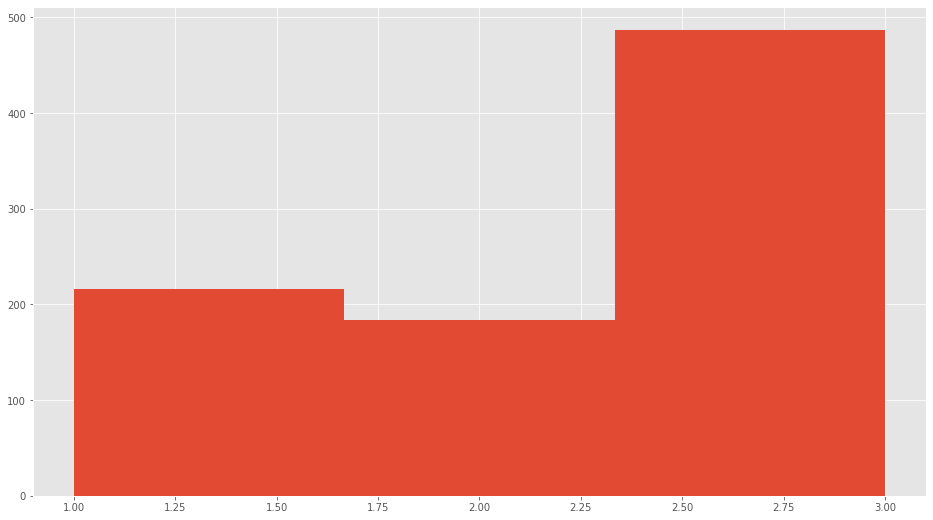

In [65]:
plt.hist(df.Pclass,bins=3)

(array([2., 0., 1.]),
 array([184., 285., 386., 487.]),
 <a list of 3 Patch objects>)

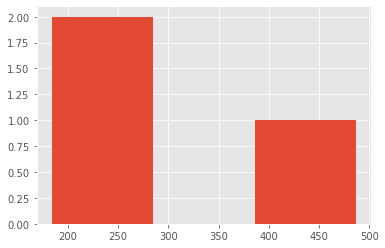

In [ ]:
plt.hist(df.groupby(["Pclass"])["Pclass"].count(),bins=3)

In [ ]:
print(df.groupby('Survived').size())

Survived
0    545
1    342
dtype: int64


In [67]:
df.groupby(["Pclass"])["Survived"].count()

Pclass
1    216
2    184
3    487
Name: Survived, dtype: int64

In [66]:
df.groupby(["Sex"])["Survived"].count()

Sex
0    573
1    314
Name: Survived, dtype: int64

In [68]:
df.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500


In [69]:
df.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500


In [18]:
print(df.groupby('Survived').size())

Survived
0    545
1    342
dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


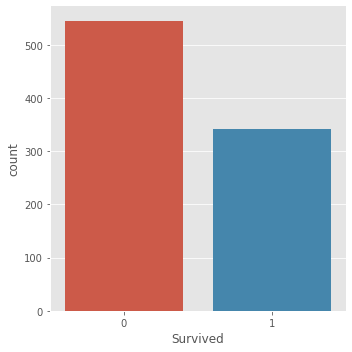

In [70]:
sb.factorplot('Survived',data=df,kind="count")

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


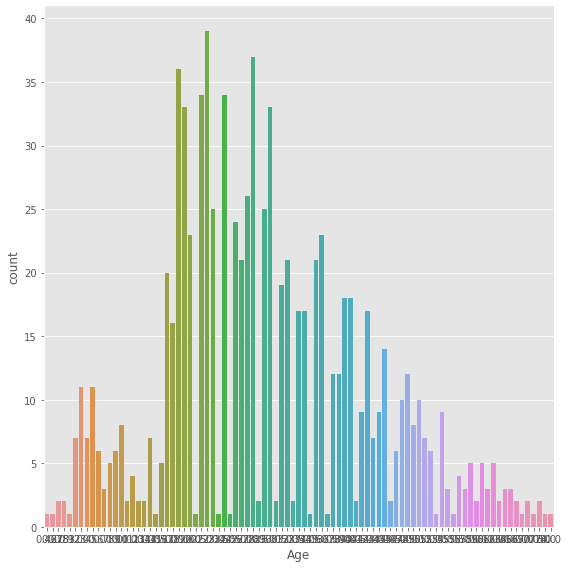

In [71]:
sb.factorplot('Age',data=df,kind="count",size=8)

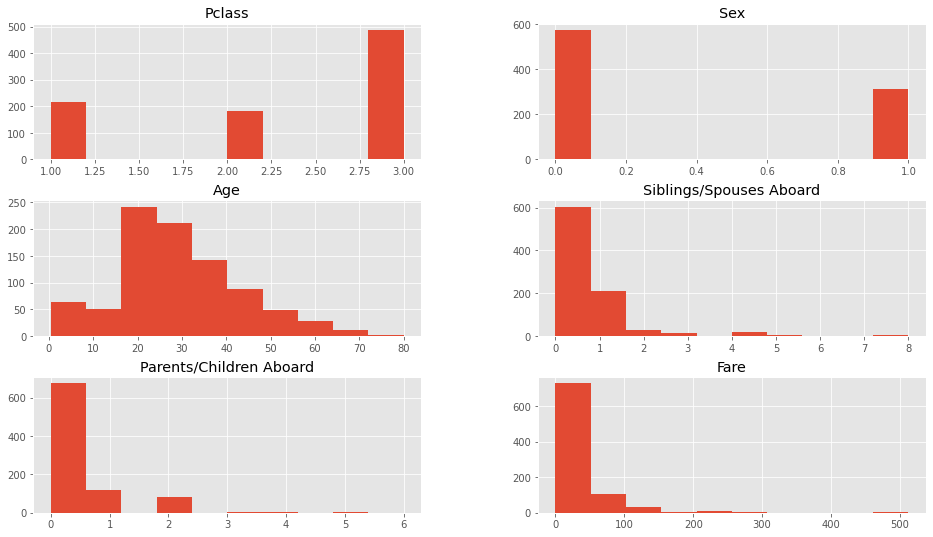

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors
df.drop(['Survived'], axis=1).hist()
plt.show()

### Resumen estadístico de los datos

In [73]:
df.describe()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,0.354002,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,0.478480,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,0.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.32920


### Selección de características usando SelectKBest con la que podemos seleccionar las 5 mejores

In [76]:
X=df.drop(['Survived'], axis=1)
y=df['Survived']
 
best=SelectKBest(k=6)
X_new = best.fit_transform(X, y)
X_new.shape
selected = best.get_support(indices=True)
print(X.columns[selected])

Index(['Pclass', 'Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Fare'],
      dtype='object')


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


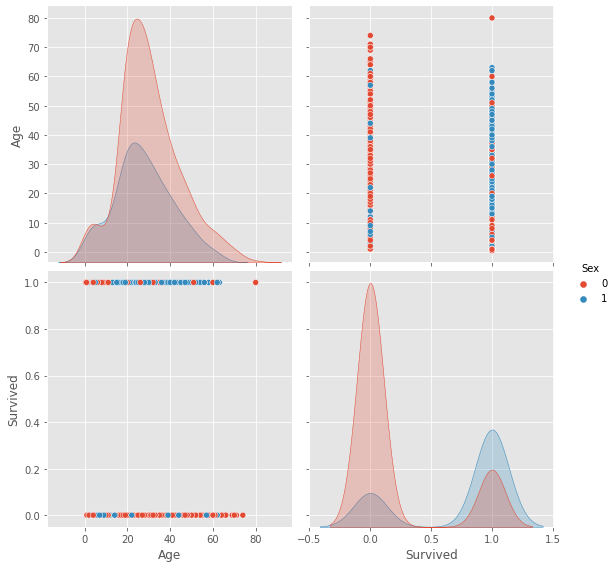

In [77]:
sb.pairplot(df, hue='Sex',size=4,vars=['Age','Survived'],kind='scatter')

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


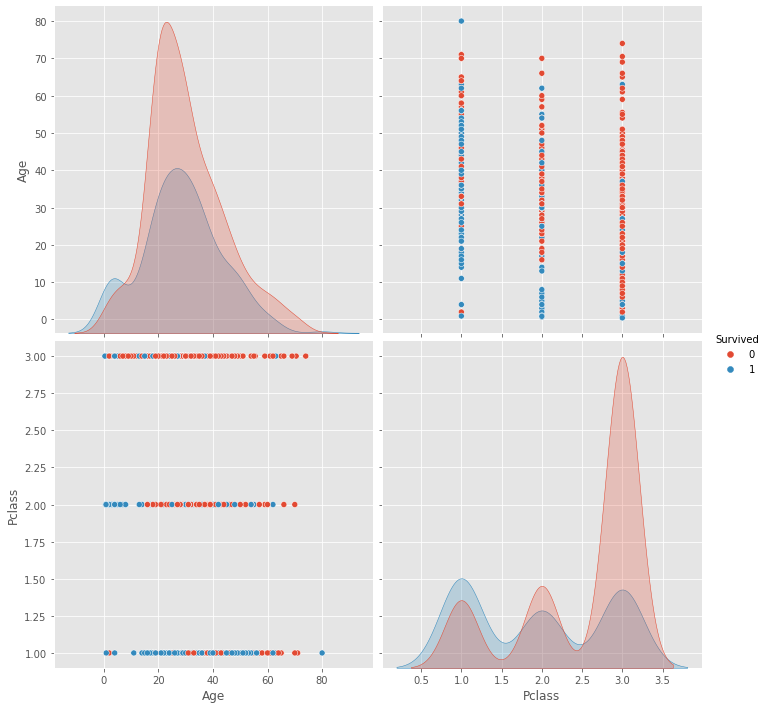

In [78]:
sb.pairplot(df, hue='Survived',size=5,vars=['Age','Pclass'],kind='scatter')

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


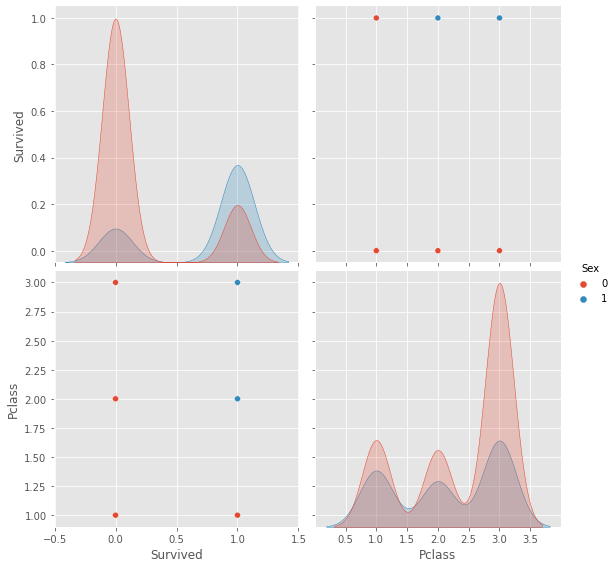

In [ ]:
sb.pairplot(df, hue='Sex',size=4,vars=['Survived','Pclass'],kind='scatter')

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


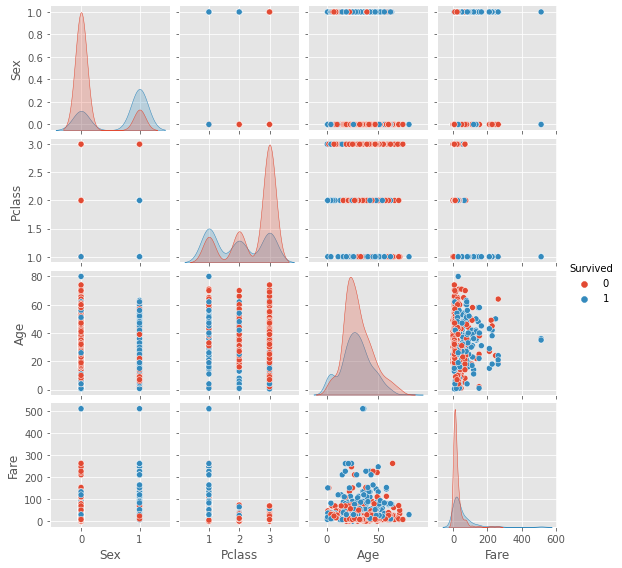

In [ ]:
sb.pairplot(df, hue='Survived',size=2,vars=['Sex','Pclass','Age','Fare'],kind='scatter')

In [79]:
df.tail()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
882,0,2,0,27.0,0,0,13.00
883,1,1,1,19.0,0,0,30.00
884,0,3,1,7.0,1,2,23.45
885,1,1,0,26.0,0,0,30.00
886,0,3,0,32.0,0,0,7.75


# Grado de correlación de características (Gráfica de Pearson)

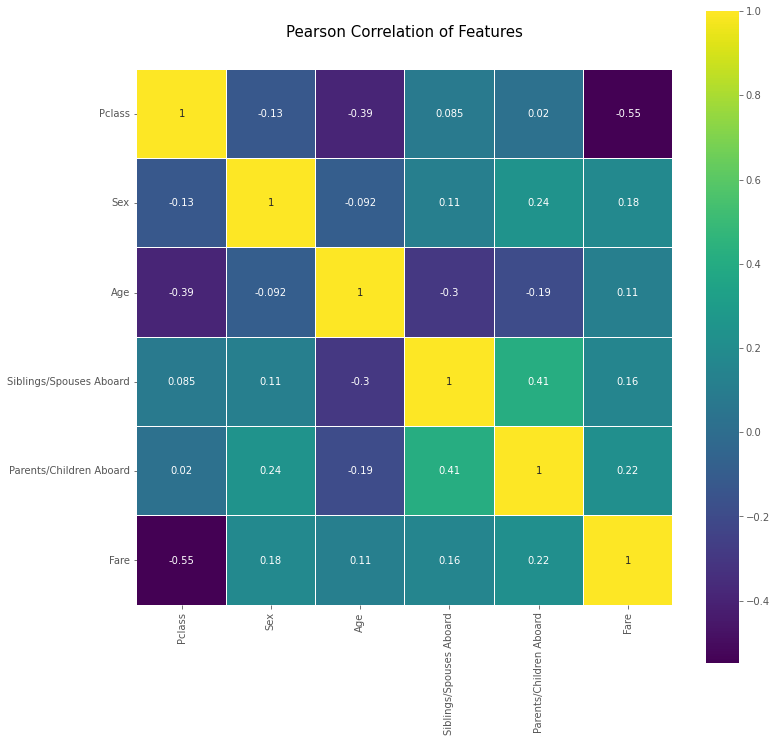

In [80]:
used_features =X.columns[selected]
 
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sb.heatmap(df[used_features].astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

### Modelo del Árbol de Decisión

**Profundidad del árbol según número de atributos (variables)**

In [81]:
cv = KFold(n_splits=20) # Numero deseado de "folds" que haremos
accuracies = list()
max_attributes = len(list(df))
depth_range = range(1, max_attributes + 1)

# Testearemos la profundidad de 1 a cantidad de atributos +1
for depth in depth_range:
    fold_accuracy = []
    tree_model = tree.DecisionTreeClassifier(criterion='entropy',
                                             min_samples_split=20,
                                             min_samples_leaf=5,
                                             max_depth = depth,
                                             class_weight={1:0.63}) 
                                                                   
    for train_fold, valid_fold in cv.split(df):
        f_train = df.loc[train_fold] 
        f_valid = df.loc[valid_fold] 

        model = tree_model.fit(X = f_train.drop(['Survived'], axis=1), 
                               y = f_train["Survived"]) 
        valid_acc = model.score(X = f_valid.drop(['Survived'], axis=1), 
                                y = f_valid["Survived"]) # calculamos la precision con el segmento de validacion
        fold_accuracy.append(valid_acc)

    avg = sum(fold_accuracy)/len(fold_accuracy)
    accuracies.append(avg)
    
# Mostramos los resultados obtenidos
dataframe = pd.DataFrame({"Max Depth": depth_range, "Average Accuracy": accuracies})
dataframe = dataframe[["Max Depth", "Average Accuracy"]]
print(dataframe.to_string(index=False))

 Max Depth  Average Accuracy
         1          0.785758
         2          0.781540
         3          0.797298
         4          0.828586
         5          0.798384
         6          0.808561
         7          0.829823


In [82]:
cv = KFold(n_splits=20) # Numero deseado de "folds" que haremos
accuracies = list()
max_attributes = len(list(df))
depth_range = range(1, max_attributes + 1)

# Testearemos la profundidad de 1 a cantidad de atributos +1
for depth in depth_range:
    fold_accuracy = []
    tree_model = tree.DecisionTreeClassifier(criterion='gini',
                                             min_samples_split=20,
                                             min_samples_leaf=5,
                                             max_depth = depth,
                                             class_weight={1:0.63}) 
                                                                   
    for train_fold, valid_fold in cv.split(df):
        f_train = df.loc[train_fold] 
        f_valid = df.loc[valid_fold] 

        model = tree_model.fit(X = f_train.drop(['Survived'], axis=1), 
                               y = f_train["Survived"]) 
        valid_acc = model.score(X = f_valid.drop(['Survived'], axis=1), 
                                y = f_valid["Survived"]) # calculamos la precision con el segmento de validacion
        fold_accuracy.append(valid_acc)

    avg = sum(fold_accuracy)/len(fold_accuracy)
    accuracies.append(avg)
    
# Mostramos los resultados obtenidos
dataframe = pd.DataFrame({"Max Depth": depth_range, "Average Accuracy": accuracies})
dataframe = dataframe[["Max Depth", "Average Accuracy"]]
print(dataframe.to_string(index=False))

 Max Depth  Average Accuracy
         1          0.785758
         2          0.779318
         3          0.796237
         4          0.828687
         5          0.795076
         6          0.809773
         7          0.818611


In [83]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth = 4, 
                             random_state = 0)

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df[used_features], df['Survived'], random_state=0)
clf.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

**Tamaño dataset de entrenamiento (train 75%) vs dataset de prueba (test 25%)**

In [85]:
# Split dataset in training and test datasets
print(len(X_train))
print(len(X_test))
print(len(Y_train))
print(len(Y_test))

665
222
665
222


**Ejemplo de Predicción del Modelo**

In [86]:
# Predict for 1 observation
#clf.predict(X_test.iloc[0].values.reshape(1, -1))
# Predict for multiple observations
print('Tamaño del dataset de prueba:')
print(X_test.shape) # Tamaño del dataset de prueba
print('Muestras Reales del dataset de prueba:')
print(X_test[0:10]) 
print('Labels Reales: 0: No Sobrevive, 1: Sobrevive')
print(Y_test[0:10])
print('Predicción de especies: 0: No Sobrevive, 1: Sobrevive')
clf.predict(X_test[0:10])

Tamaño del dataset de prueba:
(222, 6)
Muestras Reales del dataset de prueba:
     Pclass  Sex  ...  Parents/Children Aboard     Fare
14        3    1  ...                        0   7.8542
158       3    0  ...                        2  69.5500
762       1    0  ...                        0  39.6000
740       3    0  ...                        0   7.9250
482       3    1  ...                        1  25.4667
261       1    0  ...                        0   0.0000
618       1    0  ...                        0  52.5542
706       3    0  ...                        1  15.2458
533       1    0  ...                        0  26.5500
548       2    0  ...                        0  26.0000

[10 rows x 6 columns]
Labels Reales: 0: No Sobrevive, 1: Sobrevive
14     0
158    0
762    0
740    1
482    0
261    0
618    1
706    1
533    0
548    0
Name: Survived, dtype: int64
Predicción de especies: 0: No Sobrevive, 1: Sobrevive


array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0])

**Cálculo de la Exactitud (accuracy) del Modelo**

In [87]:
# The score method returns the accuracy of the model
score = clf.score(X_test, Y_test)
print(score)

0.8018018018018018


In [88]:
# List of values to try for max_depth:
max_depth_range = list(range(1, 6))
# List to store the average RMSE for each value of max_depth:
accuracy = []
for depth in max_depth_range:
    
    clf = DecisionTreeClassifier(max_depth = depth, 
                             random_state = 0)
    clf.fit(X_train, Y_train)
    score = clf.score(X_test, Y_test)
    accuracy.append(score)

In [89]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(clf.feature_importances_,4)})
importances = importances.sort_values('importance',ascending=False)
importances

,feature,importance
1,Sex,0.5291
0,Pclass,0.1580
2,Age,0.1423
5,Fare,0.1069
3,Siblings/Spouses Aboard,0.0502
4,Parents/Children Aboard,0.0135


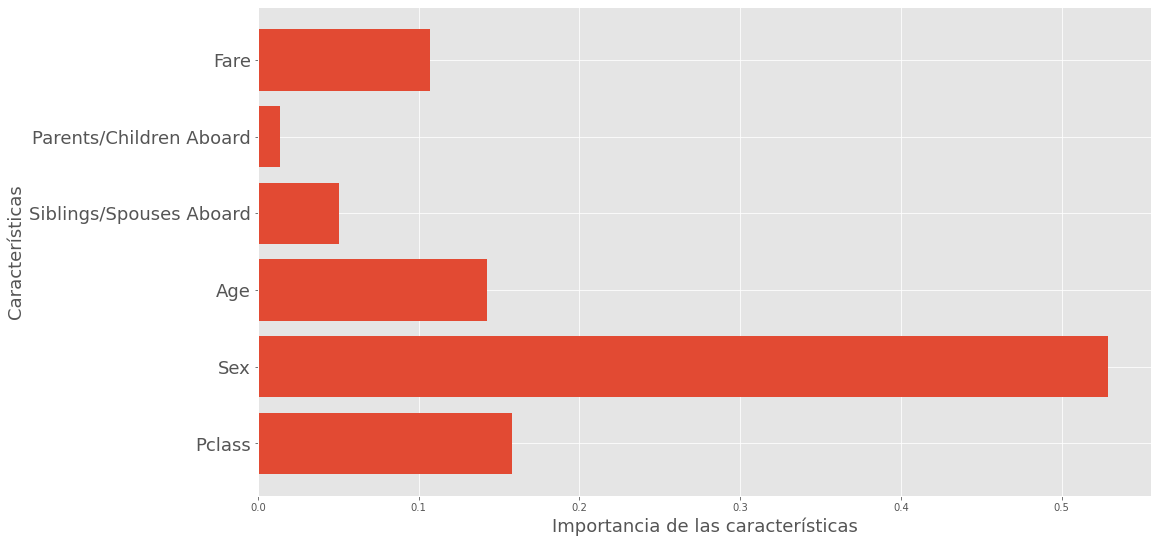

In [90]:
#Se evalua la importancia de las caractrísticas (variables)
#con la función feature_importance_ de la librería sklearn
caract=6

plt.barh(range(caract), clf.feature_importances_)
plt.yticks(np.arange(caract),['Pclass', 'Sex','Age','Siblings/Spouses Aboard','Parents/Children Aboard','Fare'], size=18)
plt.xlabel('Importancia de las características', size=18)
plt.ylabel('Características', size=18)

plt.show()

In [91]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Fare'],
      dtype='object')

**Visualización del Árbol**

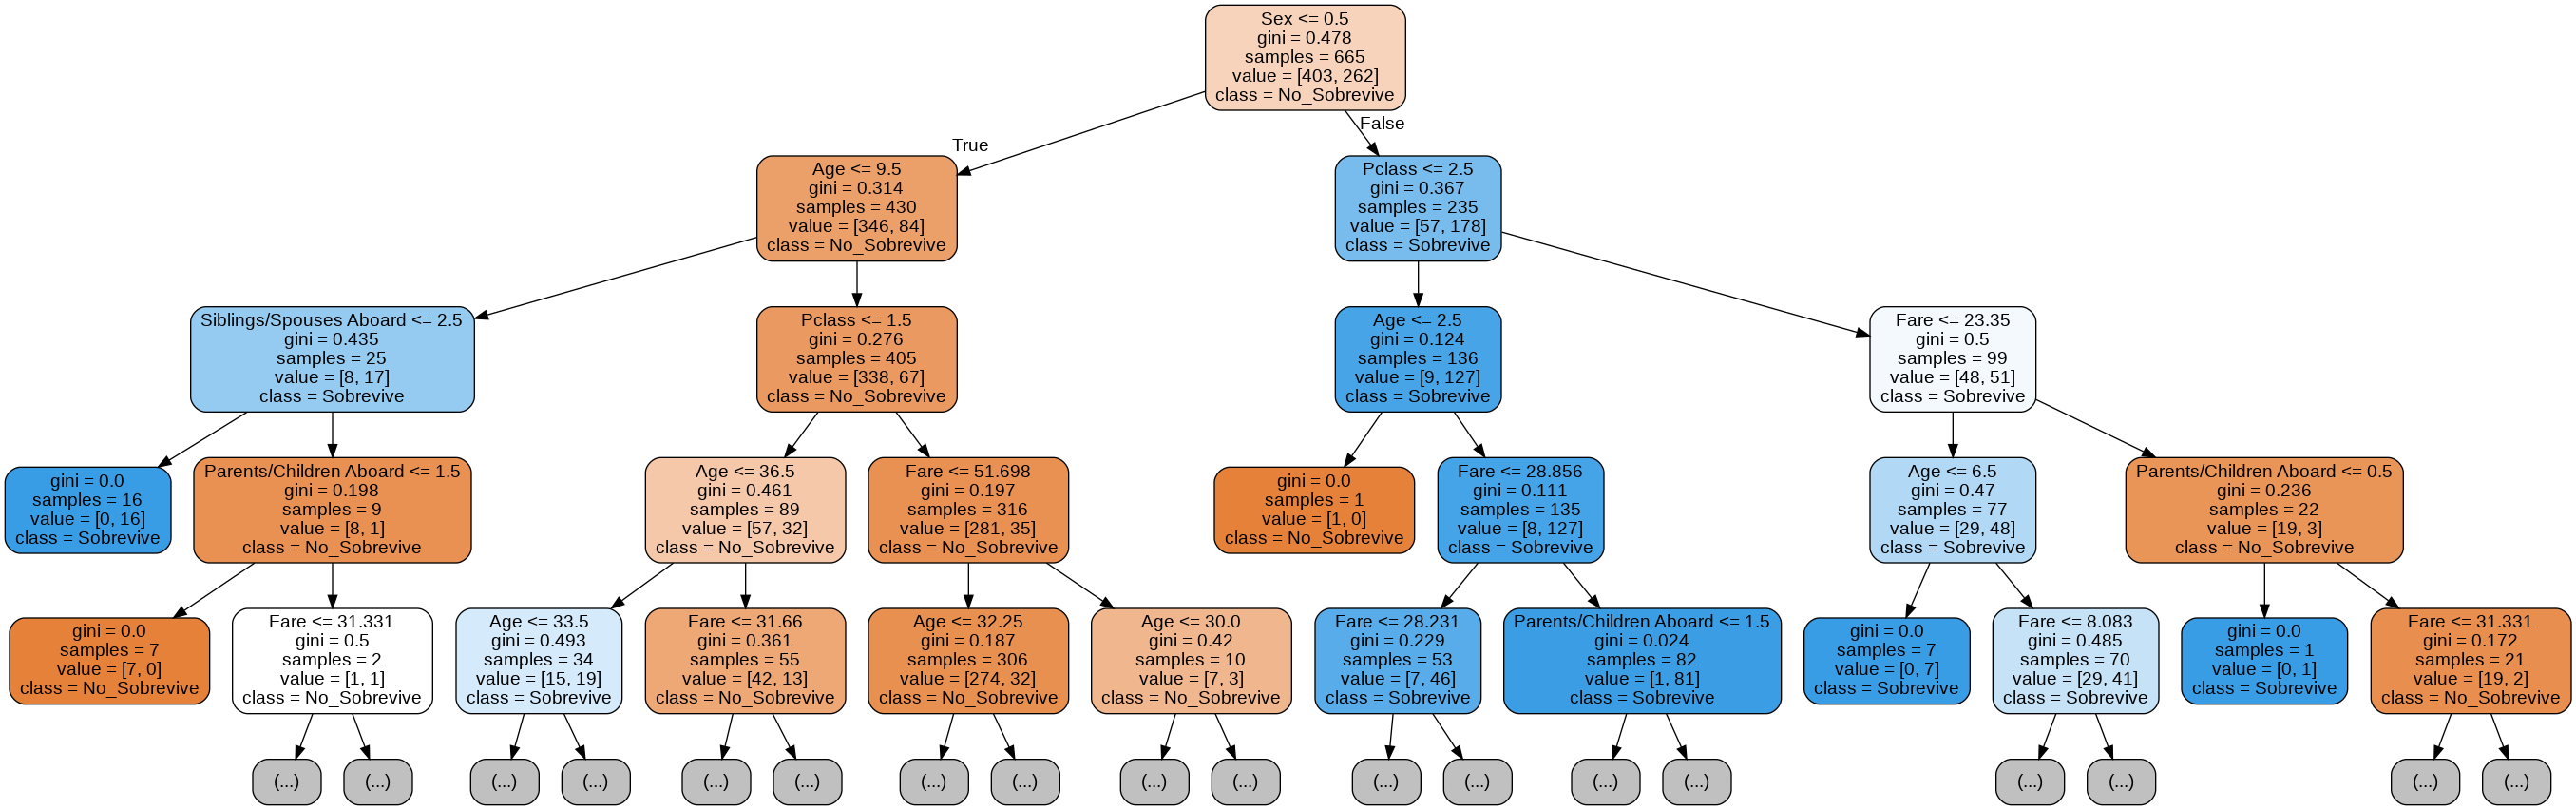

In [92]:
# exportar el modelo a archivo .dot
with open(r"tree1.dot", 'w') as f:
     f = tree.export_graphviz(clf,
                              out_file=f,
                              max_depth = 4,
                              impurity = True,
                              feature_names = list(df.drop(['Survived'], axis=1)),
                              class_names = ['No_Sobrevive', 'Sobrevive'],
                              rounded = True,
                              filled= True )
        
# Convertir el archivo .dot a png para poder visualizarlo
check_call(['dot','-Tpng',r'tree1.dot','-o',r'tree1.png'])
PImage("tree1.png")

**Métrica de Exactitud en Entrenamiento (train)**

In [93]:
acc_decision_tree = round(clf.score(X_train, Y_train) * 100, 2)
print(acc_decision_tree,'%')

86.02 %


**Métrica de Exactitud en Validación (test)**

In [94]:
acc_decision_tree = round(clf.score(X_test, Y_test) * 100, 2)
print(acc_decision_tree,'%')

80.63 %


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


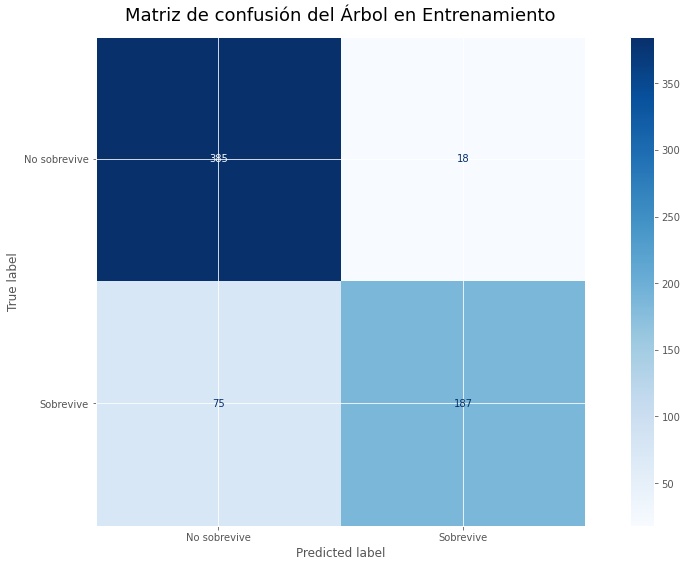

In [95]:
disp = plot_confusion_matrix(clf, X_train, Y_train,
                                 display_labels=['No sobrevive', 'Sobrevive'],
                                 cmap=plt.cm.Blues,
                                 normalize=None)
disp.ax_.set_title('Matriz de confusión del Árbol en Entrenamiento', y=1.02, size=18)

plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


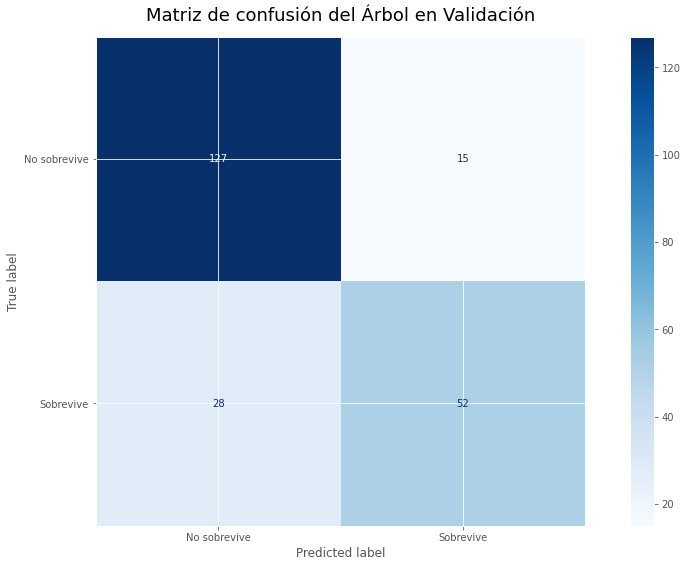

In [96]:
disp = plot_confusion_matrix(clf, X_test, Y_test,
                                 display_labels=['No sobrevive', 'Sobrevive'],
                                 cmap=plt.cm.Blues,
                                 normalize=None)
disp.ax_.set_title('Matriz de confusión del Árbol en Validación', y=1.02, size=18)

plt.show()

# Reporte de Métricas (precisión, sensibilidad, f1-score, exactitud)

# En entrenamiento

In [97]:
# Cálculo del reporte de clasificación
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score, precision_score
decoded_y_test = Y_train
decoded_predictions = clf.predict(X_train)
print(f'Reporte de clasificación:')
print(classification_report(decoded_y_test,
                            decoded_predictions))

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.84      0.96      0.89       403
           1       0.91      0.71      0.80       262

    accuracy                           0.86       665
   macro avg       0.87      0.83      0.85       665
weighted avg       0.87      0.86      0.86       665



# En validación

In [98]:
# Cálculo del reporte de clasificación
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score, precision_score
decoded_y_test = Y_test
decoded_predictions = clf.predict(X_test)
print(f'Reporte de clasificación:')
print(classification_report(decoded_y_test,
                            decoded_predictions))

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.82      0.89      0.86       142
           1       0.78      0.65      0.71        80

    accuracy                           0.81       222
   macro avg       0.80      0.77      0.78       222
weighted avg       0.80      0.81      0.80       222



# **Clasificador Bayesiano GNB (Gaussian Naive Bayes)**

In [99]:
# librerías Gaussian Naive Bayes
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import make_scorer

In [100]:
from sklearn.feature_selection import SelectKBest
X=df.drop(['Survived'], axis=1)
y=df['Survived']
 
best=SelectKBest(k=6)
X_new = best.fit_transform(X, y)
X_new.shape
selected = best.get_support(indices=True)
print(X.columns[selected])

Index(['Pclass', 'Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Fare'],
      dtype='object')


In [101]:
# Instantiate the classifier
used_features =X.columns[selected]
gnb = GaussianNB()
# Train classifier
gnb.fit(
    X_train[used_features].values,
    Y_train
)
Y_pred = gnb.predict(X_test[used_features])
 
print('Exactitud en el Entrenamiento: {:.2f}'
     .format(gnb.score(X_train[used_features], Y_train)))
print('Exactitud en la Validación (test): {:.2f}'
     .format(gnb.score(X_test[used_features], Y_test)))

Exactitud en el Entrenamiento: 0.79
Exactitud en la Validación (test): 0.80


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


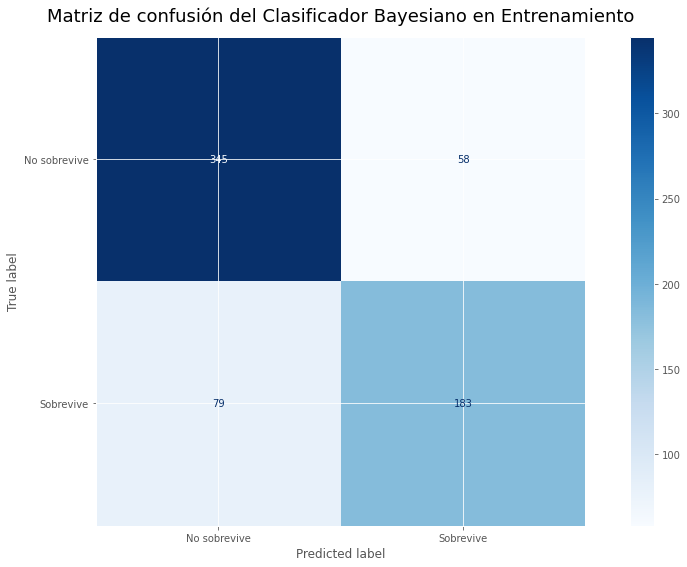

In [102]:
disp = plot_confusion_matrix(gnb, X_train, Y_train,
                                 display_labels=['No sobrevive', 'Sobrevive'],
                                 cmap=plt.cm.Blues,
                                 normalize=None)
disp.ax_.set_title('Matriz de confusión del Clasificador Bayesiano en Entrenamiento', y=1.02, size=18)

plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


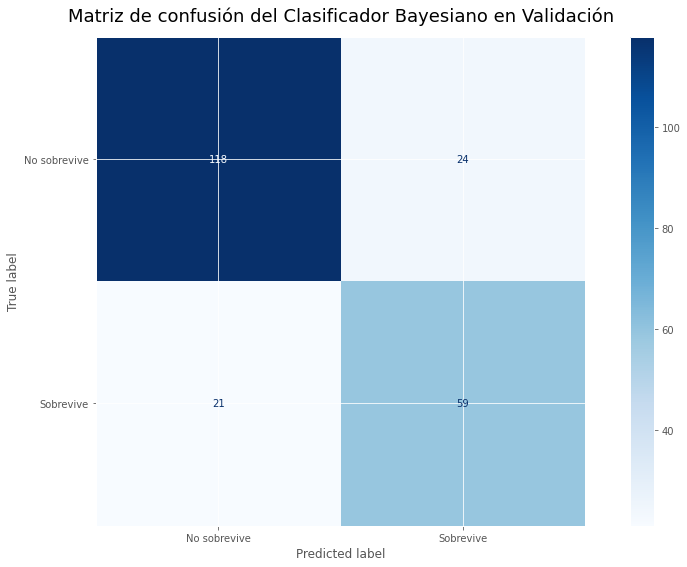

In [103]:
disp = plot_confusion_matrix(gnb, X_test, Y_test,
                                 display_labels=['No sobrevive', 'Sobrevive'],
                                 cmap=plt.cm.Blues,
                                 normalize=None)
disp.ax_.set_title('Matriz de confusión del Clasificador Bayesiano en Validación', y=1.02, size=18)

plt.show()

In [104]:
#                 'Pclass', 'Sex', 'Age', 'Siblings/Spouses Aboard', 'Parents/Children Aboard', 'Fare'
print(gnb.predict([[ 3,  1,  26,  0,  0,  7.925],     # 1 Sobrevive --> Miss. Laina Heikkinen
                   [ 3,  0,  2,  3,  1,  21.075],     # 0 No Sobrevive --> niño Master. Gosta Leonard Palsson
                   [ 1,  1,  58,  0,  0,  26.55],     # 1 Sobrevive -->  Miss. Elizabeth Bonnell
                   ]))

[1 0 1]


# Reporte de Métricas (precisión, sensibilidad, f1-score, exactitud)

# En entrenamiento

In [105]:
# Cálculo del reporte de clasificación
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score, precision_score
decoded_y_test = Y_train
decoded_predictions = clf.predict(X_train)
print(f'Reporte de clasificación:')
print(classification_report(decoded_y_test,
                            decoded_predictions))

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.84      0.96      0.89       403
           1       0.91      0.71      0.80       262

    accuracy                           0.86       665
   macro avg       0.87      0.83      0.85       665
weighted avg       0.87      0.86      0.86       665



# En Validación

In [106]:
# Cálculo del reporte de clasificación
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score, precision_score
decoded_y_test = Y_test
decoded_predictions = Y_pred
print(f'Reporte de clasificación:')
print(classification_report(decoded_y_test,
                            decoded_predictions))

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       142
           1       0.71      0.74      0.72        80

    accuracy                           0.80       222
   macro avg       0.78      0.78      0.78       222
weighted avg       0.80      0.80      0.80       222

